# Esercitazione 11

## Esercizio 11.1

Vogliamo utilizzare una rete neurale per fare un fit lineare.

Scegliamo quindi una funzione da fittare:
$$
f(x)=2x+1
$$

Utilizziamo la rete neurale più semplice possibile, ovvero una rete composta da un solo neurone, e vediamo che questa rete è in grado di effettuare il fit e come i risultati ottenuti dipendano da alcuni dei parametri del processo di machine learning.

Per prima cosa dobbiamo generare i dati di tranining e validazione per la rete neurale. Chiaramente il numero di dati di training e validazione è un parametro importante in quanto avere un maggiore (o minore) numero di dati su cui il modello impara influenza fortemente la capacità di sfruttare quanto appreso per determinare i paramentri della funzione da fittare.


### Numero di dati di training:

Proviamo quindi a definire dei set di dati di dimensioni diverse per vedere quanto il numero di dati a disposizione influenzi i risultati del nostro fit.
Definiamo tre diversi set di dati:

- 100 dati di trainining, 10 dati di validazione
- 300 dati di trainining, 30 dati di validazione
- 500 dati di trainining, 50 dati di validazione

e vediamo come cambia l'output del processo al variare del numero di dati in input.

Per prima cosa riportiamo una figura della funzione che vogliamo fittare.

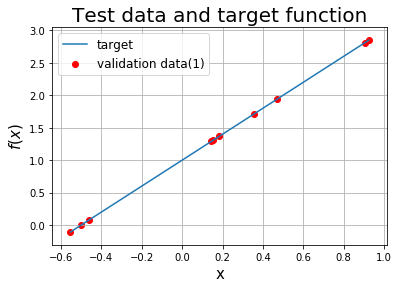

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 100)    #generate 100 points randomly distributed in [-1,1]
x_valid = np.random.uniform(-1, 1, 10)     #generate 10 points randomly distributed in [-1,1]

x_train2 = np.random.uniform(-1, 1, 300)    #generate 300 points randomly distributed in [-1,1]
x_valid2 = np.random.uniform(-1, 1, 30)     #generate 30 points randomly distributed in [-1,1]

x_train3 = np.random.uniform(-1, 1, 500)    #generate 500 points randomly distributed in [-1,1]
x_valid3 = np.random.uniform(-1, 1, 50)     #generate 50 points randomly distributed in [-1,1]

x_valid.sort()                              #order the data (necessary for plotting)
x_valid2.sort()
x_valid3.sort()


m = 2                                       #slope
b = 1                                       #intersect

y_target = m * x_valid + b                  #ideal (target) linear function (no noise)
y_target2 = m * x_valid2 + b                #ideal (target) linear function (no noise)
y_target3 = m * x_valid3 + b                #ideal (target) linear function (no noise)

sigma = 0.0                                 #noise standard deviation, for the moment it is absent

y_train = np.random.normal(m * x_train + b, sigma) #actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

y_train2 = np.random.normal(m * x_train2 + b, sigma) #actual measures from which we want to guess regression parameters
y_valid2 = np.random.normal(m * x_valid2 + b, sigma)

y_train3 = np.random.normal(m * x_train3 + b, sigma) #actual measures from which we want to guess regression parameters
y_valid3 = np.random.normal(m * x_valid3 + b, sigma)


# plot training and target dataset
plt.plot(x_valid, y_target, label = 'target')
plt.scatter(x_valid, y_valid, label = 'validation data(1)', color = 'r')
plt.title('Test data and target function', fontsize = 20)
plt.xlabel('x', fontsize = 15)
plt.ylabel('$f(x)$', fontsize = 15)
plt.legend(fontsize = 12)
plt.grid(True); 
plt.show()

Utilizziamo la libreria $keras$ per definire e compilare i modelli che descrivono la nostra rete neurale fatta da un singolo neurone. 

In [34]:
#compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()         #sequential model
model.add(Dense(1, input_shape=(1,))) #add 1 layer

model2 = tf.keras.Sequential()         #sequential model
model2.add(Dense(1, input_shape=(1,))) #add 1 layer

model3 = tf.keras.Sequential()         #sequential model
model3.add(Dense(1, input_shape=(1,))) #add 1 layer

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model3.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
print ("Model 1, ", len(x_train), " tranining data")
model.summary()
print()
print ("Model 2, ", len(x_train2), " tranining data")
model2.summary()
print()
print ("Model 3, ", len(x_train3), " tranining data")
model3.summary()

Model 1,  100  tranining data
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________

Model 2,  300  tranining data
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________

Model 3,  500  tranining data
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 1)                 2   

Facciamo allenare la rete sui tre diversi set di dati di input.

In [35]:
# fit the model using training dataset
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))

history2 = model2.fit(x=x_train2, y=y_train2, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid2, y_valid2))

history3 = model3.fit(x=x_train3, y=y_train3, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid3, y_valid3))

Epoch 1/30
4/4 [==============================] - 0s 27ms/step - loss: 3.7624 - mse: 3.7624 - val_loss: 4.4031 - val_mse: 4.4031
Epoch 2/30
4/4 [==============================] - 0s 11ms/step - loss: 3.5434 - mse: 3.5434 - val_loss: 4.0385 - val_mse: 4.0385
Epoch 3/30
4/4 [==============================] - 0s 18ms/step - loss: 3.2914 - mse: 3.2914 - val_loss: 3.7395 - val_mse: 3.7395
Epoch 4/30
4/4 [==============================] - 0s 15ms/step - loss: 3.0695 - mse: 3.0695 - val_loss: 3.4639 - val_mse: 3.4639
Epoch 5/30
4/4 [==============================] - 0s 13ms/step - loss: 2.8691 - mse: 2.8691 - val_loss: 3.2496 - val_mse: 3.2496
Epoch 6/30
4/4 [==============================] - 0s 17ms/step - loss: 2.7059 - mse: 2.7059 - val_loss: 2.9627 - val_mse: 2.9627
Epoch 7/30
4/4 [==============================] - 0s 19ms/step - loss: 2.5032 - mse: 2.5032 - val_loss: 2.7892 - val_mse: 2.7892
Epoch 8/30
4/4 [==============================] - 0s 22ms/step - loss: 2.3754 - mse: 2.3754 - val

Epoch 4/30
16/16 [==============================] - 0s 4ms/step - loss: 0.5353 - mse: 0.5353 - val_loss: 0.4500 - val_mse: 0.4500
Epoch 5/30
16/16 [==============================] - 0s 5ms/step - loss: 0.4007 - mse: 0.4007 - val_loss: 0.3366 - val_mse: 0.3366
Epoch 6/30
16/16 [==============================] - 0s 4ms/step - loss: 0.3056 - mse: 0.3056 - val_loss: 0.2573 - val_mse: 0.2573
Epoch 7/30
16/16 [==============================] - 0s 4ms/step - loss: 0.2374 - mse: 0.2374 - val_loss: 0.2000 - val_mse: 0.2000
Epoch 8/30
16/16 [==============================] - 0s 4ms/step - loss: 0.1868 - mse: 0.1868 - val_loss: 0.1566 - val_mse: 0.1566
Epoch 9/30
16/16 [==============================] - 0s 4ms/step - loss: 0.1477 - mse: 0.1477 - val_loss: 0.1242 - val_mse: 0.1242
Epoch 10/30
16/16 [==============================] - 0s 4ms/step - loss: 0.1179 - mse: 0.1179 - val_loss: 0.0984 - val_mse: 0.0984
Epoch 11/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0939 - mse: 0.

Riportiamo i valori di $m$ e $q$ trovati nei tre casi:

In [36]:
# return weights
print (len(x_train), " tranining data")
print ("m = ", model.get_weights()[0], "     q = ",model.get_weights()[1])
print()
print (len(x_train2), " tranining data")
print ("m = ", model2.get_weights()[0], "     q = ",model2.get_weights()[1])
print()
print (len(x_train3), " tranining data")
print ("m = ", model3.get_weights()[0], "     q = ",model3.get_weights()[1])

100  tranining data
m =  [[0.56218094]]      q =  [0.7766663]

300  tranining data
m =  [[1.8025303]]      q =  [0.99721295]

500  tranining data
m =  [[1.9385142]]      q =  [0.9999328]


Come ci potevamo aspettare i parametri ottenuti si avvicinano ai valori desiderati $m = 2$, $q = 1$ man mano che cresce il numero di dati utilizzati per il training.

Un'ulteriore conferma del fatto che la rete riesca meglio a fittare la funzione quando sono presenti più dati di input è data dal fatto che alla fine del processo di apprendimento la funzione $\textit{loss}$ ha un valore minore al crescere del numero di dati di training.

2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - mse: 0.0012    

Test loss, 100 training data: 0.7474635243415833

Test loss, 300 training data: 0.013415331020951271

Test loss, 500 training data: 0.0011980317067354918


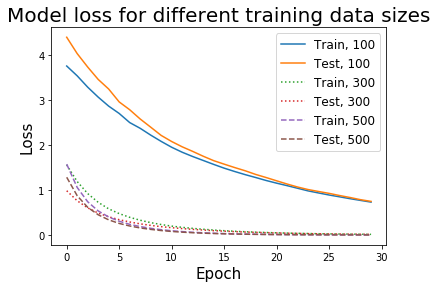

In [43]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
score2 = model2.evaluate(x_valid2, y_valid2, batch_size=32, verbose=1)
score3 = model3.evaluate(x_valid3, y_valid3, batch_size=32, verbose=1)

# print performance
print()
print('Test loss, 100 training data:' , score[0])
print()
print('Test loss, 300 training data:', score2[0])
print()
print('Test loss, 500 training data:', score3[0])


# Plot training & validation loss values
plt.plot(history.history['loss'],label = 'Train, 100')
plt.plot(history.history['val_loss'], label = 'Test, 100')

plt.plot(history2.history['loss'],label = 'Train, 300',linestyle = 'dotted')
plt.plot(history2.history['val_loss'], label = 'Test, 300',linestyle = 'dotted')

plt.plot(history3.history['loss'],label = 'Train, 500', linestyle = 'dashed')
plt.plot(history3.history['val_loss'], label = 'Test, 500', linestyle = 'dashed')
plt.title('Model loss for different training data sizes', fontsize = 20)
plt.ylabel('Loss', fontsize = 15)
plt.xlabel('Epoch', fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

Possiamo anche mostrare i valori di $f(x)$ previsti dai nostri modelli per un nuovo set di dati x. 

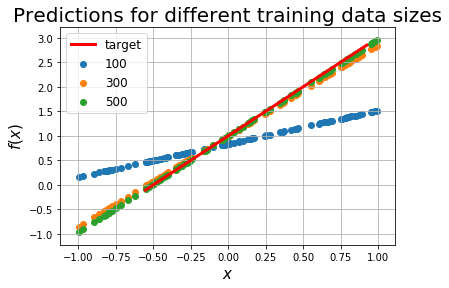

In [6]:
import matplotlib
import matplotlib.pyplot as plt
x_predicted = np.random.uniform(-1, 1, 100)

y_predicted = model.predict(x_predicted)
y_predicted2 = model2.predict(x_predicted)
y_predicted3 = model3.predict(x_predicted)

plt.plot(x_valid, y_target, color = 'r', label = 'target', linewidth = 3)
plt.scatter(x_predicted, y_predicted, label = len(x_train))
plt.scatter(x_predicted, y_predicted2, label = len(x_train2))
plt.scatter(x_predicted, y_predicted3, label = len(x_train3))
plt.grid(True)
plt.title('Predictions for different training data sizes', fontsize = 20)
plt.ylabel('$f(x)$', fontsize = 15)
plt.xlabel('$x$', fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

Come era prevedibile guardando i coefficienti ottenuti dai vari modelli, osserviamo che la bontà della predizione aumenta notevolmente al crescere del numero di dati di training. 

### Numero di dati di test/validazione:

Possiamo ora vedere cosa succede se abbiamo delle variazioni relative nel numero di dati utilizzati per il training e per il test. Utilizziamo quindi lo stesso numero di dati di training ($500$) e vediamo cosa succed se usiamo $2$, $10$ o $100$ dati di test.

In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)   

x_valid = np.random.uniform(-1, 1, 100)     
x_valid2 = np.random.uniform(-1, 1, 10)     
x_valid3 = np.random.uniform(-1, 1, 2)    

x_valid.sort()
x_valid2.sort()
x_valid3.sort()

m = 2                                       
b = 1                                       
y_target = m * x_valid + b                 
y_target2 = m * x_valid2 + b                 
y_target2 = m * x_valid3 + b                 

sigma = 0.0                                       

y_train = np.random.normal(m * x_train + b, sigma) 
y_valid = np.random.normal(m * x_valid + b, sigma)
y_valid2 = np.random.normal(m * x_valid2 + b, sigma)
y_valid3 = np.random.normal(m * x_valid3 + b, sigma)


model = tf.keras.Sequential() 
model.add(Dense(1, input_shape=(1,))) 
model2 = tf.keras.Sequential() 
model2.add(Dense(1, input_shape=(1,))) 
model3 = tf.keras.Sequential() 
model3.add(Dense(1, input_shape=(1,))) 

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model3.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))
history2 = model2.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid2, y_valid2))
history3 = model3.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid3, y_valid3))

Epoch 1/30
16/16 [==============================] - 0s 9ms/step - loss: 3.0119 - mse: 3.0119 - val_loss: 2.7309 - val_mse: 2.7309
Epoch 2/30
16/16 [==============================] - 0s 4ms/step - loss: 2.2176 - mse: 2.2176 - val_loss: 2.0432 - val_mse: 2.0432
Epoch 3/30
16/16 [==============================] - 0s 4ms/step - loss: 1.6754 - mse: 1.6754 - val_loss: 1.5638 - val_mse: 1.5638
Epoch 4/30
16/16 [==============================] - 0s 4ms/step - loss: 1.2914 - mse: 1.2914 - val_loss: 1.2162 - val_mse: 1.2162
Epoch 5/30
16/16 [==============================] - 0s 4ms/step - loss: 1.0102 - mse: 1.0102 - val_loss: 0.9553 - val_mse: 0.9553
Epoch 6/30
16/16 [==============================] - 0s 3ms/step - loss: 0.7975 - mse: 0.7975 - val_loss: 0.7559 - val_mse: 0.7559
Epoch 7/30
16/16 [==============================] - 0s 4ms/step - loss: 0.6334 - mse: 0.6334 - val_loss: 0.6003 - val_mse: 0.6003
Epoch 8/30
16/16 [==============================] - 0s 5ms/step - loss: 0.5047 - mse: 0.50

100  validation data
m =  [[1.8968757]]      q =  [0.9989946]

10  validation data
m =  [[1.9487084]]      q =  [0.9996103]

2  validation data
m =  [[1.9711578]]      q =  [0.9996345]


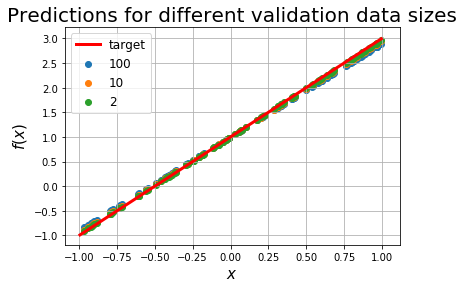

In [9]:
print (len(x_valid), " validation data")
print ("m = ", model.get_weights()[0], "     q = ",model.get_weights()[1])
print()
print (len(x_valid2), " validation data")
print ("m = ", model2.get_weights()[0], "     q = ",model2.get_weights()[1])
print()
print (len(x_valid3), " validation data")
print ("m = ", model3.get_weights()[0], "     q = ",model3.get_weights()[1])

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
y_predicted2 = model2.predict(x_predicted)
y_predicted3 = model3.predict(x_predicted)

plt.plot(x_valid, y_target, color = 'r', label = 'target', linewidth = 3)
plt.scatter(x_predicted, y_predicted, label = len(x_valid))
plt.scatter(x_predicted, y_predicted2, label = len(x_valid2))
plt.scatter(x_predicted, y_predicted3, label = len(x_valid3))
plt.grid(True)
plt.title('Predictions for different validation data sizes', fontsize = 20)
plt.ylabel('$f(x)$', fontsize = 15)
plt.xlabel('$x$', fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

Guardando sia i valori trovati per $m$ e $q$ che il plot delle previsioniri previsti sembra che non ci siano differenze significative nei risultati legate alla scelta del numero di punti per la validazione.

### Numero di epoche:

Possiamo ora vedere se, anche partendo da pochi dati di training si riesce ad arrivare a risultati migliori aumentando il numero di epoche. Usiamo quindi $100$ dati di training e $10$ di validazione e vediamo se con $30$, $60$ o $120$ epoche osserviamo un miglioramento nei risultati del fit.

In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 100)    
x_valid = np.random.uniform(-1, 1, 10)     

x_valid.sort()
m = 2                                       
b = 1                                       
y_target = m * x_valid + b                 

sigma = 0.0                                       

y_train = np.random.normal(m * x_train + b, sigma) 
y_valid = np.random.normal(m * x_valid + b, sigma)

model = tf.keras.Sequential() 
model.add(Dense(1, input_shape=(1,))) 
model2 = tf.keras.Sequential() 
model2.add(Dense(1, input_shape=(1,))) 
model3 = tf.keras.Sequential() 
model3.add(Dense(1, input_shape=(1,))) 

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model3.compile(optimizer='sgd', loss='mse', metrics=['mse'])

epo1 = 30
epo2 = 60
epo3 = 120

history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=epo1, shuffle=True, validation_data=(x_valid, y_valid))
history2 = model2.fit(x=x_train, y=y_train, batch_size=32, epochs=epo2, shuffle=True, validation_data=(x_valid, y_valid))
history3 = model3.fit(x=x_train, y=y_train, batch_size=32, epochs=epo3, shuffle=True, validation_data=(x_valid, y_valid))

Epoch 1/30
4/4 [==============================] - 0s 29ms/step - loss: 2.9960 - mse: 2.9960 - val_loss: 3.5304 - val_mse: 3.5304
Epoch 2/30
4/4 [==============================] - 0s 12ms/step - loss: 2.7693 - mse: 2.7693 - val_loss: 3.2616 - val_mse: 3.2616
Epoch 3/30
4/4 [==============================] - 0s 18ms/step - loss: 2.5777 - mse: 2.5777 - val_loss: 2.9337 - val_mse: 2.9337
Epoch 4/30
4/4 [==============================] - 0s 12ms/step - loss: 2.3544 - mse: 2.3544 - val_loss: 2.7163 - val_mse: 2.7163
Epoch 5/30
4/4 [==============================] - 0s 16ms/step - loss: 2.1975 - mse: 2.1975 - val_loss: 2.5183 - val_mse: 2.5183
Epoch 6/30
4/4 [==============================] - 0s 19ms/step - loss: 2.0527 - mse: 2.0527 - val_loss: 2.3398 - val_mse: 2.3398
Epoch 7/30
4/4 [==============================] - 0s 16ms/step - loss: 1.9250 - mse: 1.9250 - val_loss: 2.1661 - val_mse: 2.1661
Epoch 8/30
4/4 [==============================] - 0s 15ms/step - loss: 1.8041 - mse: 1.8041 - val

Epoch 37/120
4/4 [==============================] - 0s 15ms/step - loss: 0.2545 - mse: 0.2545 - val_loss: 0.2579 - val_mse: 0.2579
Epoch 38/120
4/4 [==============================] - 0s 10ms/step - loss: 0.2422 - mse: 0.2422 - val_loss: 0.2420 - val_mse: 0.2420
Epoch 39/120
4/4 [==============================] - 0s 15ms/step - loss: 0.2292 - mse: 0.2292 - val_loss: 0.2307 - val_mse: 0.2307
Epoch 40/120
4/4 [==============================] - 0s 12ms/step - loss: 0.2186 - mse: 0.2186 - val_loss: 0.2205 - val_mse: 0.2205
Epoch 41/120
4/4 [==============================] - 0s 14ms/step - loss: 0.2083 - mse: 0.2083 - val_loss: 0.2065 - val_mse: 0.2065
Epoch 42/120
4/4 [==============================] - 0s 14ms/step - loss: 0.1973 - mse: 0.1973 - val_loss: 0.1958 - val_mse: 0.1958
Epoch 43/120
4/4 [==============================] - 0s 12ms/step - loss: 0.1878 - mse: 0.1878 - val_loss: 0.1855 - val_mse: 0.1855
Epoch 44/120
4/4 [==============================] - 0s 16ms/step - loss: 0.1773 - m

1/1 [==============================] - 0s 2ms/step - loss: 3.0366e-04 - mse: 3.0366e-04

Test loss, 30 epochs: 0.48140302300453186

Test loss, 60 epochs: 0.01263745129108429

Test loss, 120 epochs: 0.00030365929706022143


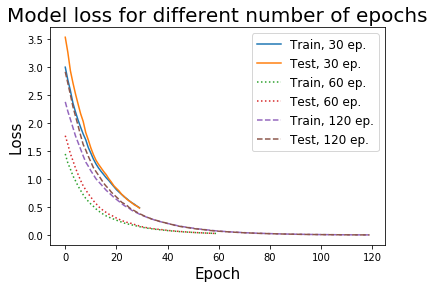

In [11]:
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
score2 = model2.evaluate(x_valid2, y_valid2, batch_size=32, verbose=1)
score3 = model3.evaluate(x_valid3, y_valid3, batch_size=32, verbose=1)
print()
print('Test loss, 30 epochs:', score[0])
print()
print('Test loss, 60 epochs:', score2[0])
print()
print('Test loss, 120 epochs:', score3[0])

plt.plot(history.history['loss'],label = 'Train, 30 ep.')
plt.plot(history.history['val_loss'], label = 'Test, 30 ep.')
plt.plot(history2.history['loss'],label = 'Train, 60 ep.',linestyle = 'dotted')
plt.plot(history2.history['val_loss'], label = 'Test, 60 ep.',linestyle = 'dotted')
plt.plot(history3.history['loss'],label = 'Train, 120 ep.', linestyle = 'dashed')
plt.plot(history3.history['val_loss'], label = 'Test, 120 ep.', linestyle = 'dashed')
plt.title('Model loss for different number of epochs', fontsize = 20)
plt.ylabel('Loss', fontsize = 15)
plt.xlabel('Epoch', fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

30  epochs
m =  [[0.82672286]]      q =  [0.84034836]

60  epochs
m =  [[1.7111732]]      q =  [0.96116555]

120  epochs
m =  [[1.9031466]]      q =  [0.9931141]



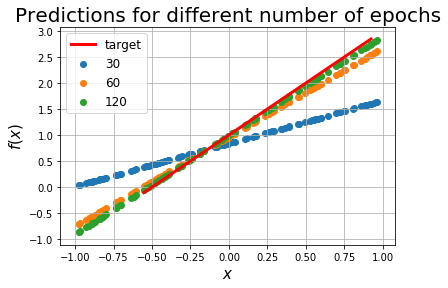

In [12]:
import matplotlib
import matplotlib.pyplot as plt
print ( epo1, " epochs")
print ("m = ", model.get_weights()[0], "     q = ",model.get_weights()[1])
print()
print (epo2, " epochs")
print ("m = ", model2.get_weights()[0], "     q = ",model2.get_weights()[1])
print()
print (epo3, " epochs")
print ("m = ", model3.get_weights()[0], "     q = ",model3.get_weights()[1])
print()

x_predicted = np.random.uniform(-1, 1, 100)

y_predicted = model.predict(x_predicted)
y_predicted2 = model2.predict(x_predicted)
y_predicted3 = model3.predict(x_predicted)

plt.plot(x_valid, y_target, color = 'r', label = 'target', linewidth = 3)
plt.scatter(x_predicted, y_predicted, label = epo1)
plt.scatter(x_predicted, y_predicted2, label = epo2)
plt.scatter(x_predicted, y_predicted3, label = epo3)
plt.grid(True)
plt.title('Predictions for different number of epochs', fontsize = 20)
plt.ylabel('$f(x)$', fontsize = 15)
plt.xlabel('$x$', fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

Osserviamo che per soli $100$ dati di training $30$ epoche sono troppe poche per ottenere i parametri corretti del fit ma che, invece, il fit ha maggiore successo se aumentiamo il numero di epoche.

### Rumore

Proviamo infine ad aggiungere un rumore gaussiano alla generazione di punti di training e validazione. 

Confrontiamo i risultati ottenuti per:
- $\sigma = 0$
- $\sigma = 0.3$
- $\sigma = 0.7$

In [44]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)    
x_valid = np.random.uniform(-1, 1, 50)     

x_valid.sort()

m = 2                                       
b = 1      

y_target = m * x_valid + b                 

sigma1 = 0.0                                       
sigma2 = 0.3                                       
sigma3 = 0.7                                      

y_train = np.random.normal(m * x_train + b, sigma1) 
y_valid = np.random.normal(m * x_valid + b, sigma1)

y_train2 = np.random.normal(m * x_train + b, sigma2) 
y_valid2 = np.random.normal(m * x_valid + b, sigma2)

y_train3 = np.random.normal(m * x_train + b, sigma3) 
y_valid3 = np.random.normal(m * x_valid + b, sigma3)


model = tf.keras.Sequential() 
model.add(Dense(1, input_shape=(1,))) 
model2 = tf.keras.Sequential() 
model2.add(Dense(1, input_shape=(1,))) 
model3 = tf.keras.Sequential() 
model3.add(Dense(1, input_shape=(1,))) 

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model3.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))
history2 = model2.fit(x=x_train, y=y_train2, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid2))
history3 = model3.fit(x=x_train, y=y_train3, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid3))

Epoch 1/30
16/16 [==============================] - 0s 9ms/step - loss: 4.1586 - mse: 4.1586 - val_loss: 3.1515 - val_mse: 3.1515
Epoch 2/30
16/16 [==============================] - 0s 4ms/step - loss: 3.1354 - mse: 3.1354 - val_loss: 2.4264 - val_mse: 2.4264
Epoch 3/30
16/16 [==============================] - 0s 4ms/step - loss: 2.4167 - mse: 2.4167 - val_loss: 1.8981 - val_mse: 1.8981
Epoch 4/30
16/16 [==============================] - 0s 4ms/step - loss: 1.8888 - mse: 1.8888 - val_loss: 1.4982 - val_mse: 1.4982
Epoch 5/30
16/16 [==============================] - 0s 5ms/step - loss: 1.4871 - mse: 1.4871 - val_loss: 1.1928 - val_mse: 1.1928
Epoch 6/30
16/16 [==============================] - 0s 4ms/step - loss: 1.1805 - mse: 1.1805 - val_loss: 0.9529 - val_mse: 0.9529
Epoch 7/30
16/16 [==============================] - 0s 4ms/step - loss: 0.9403 - mse: 0.9403 - val_loss: 0.7647 - val_mse: 0.7647
Epoch 8/30
16/16 [==============================] - 0s 6ms/step - loss: 0.7528 - mse: 0.75

Epoch 4/30
16/16 [==============================] - 0s 4ms/step - loss: 1.4927 - mse: 1.4927 - val_loss: 1.3644 - val_mse: 1.3644
Epoch 5/30
16/16 [==============================] - 0s 5ms/step - loss: 1.2664 - mse: 1.2664 - val_loss: 1.1735 - val_mse: 1.1735
Epoch 6/30
16/16 [==============================] - 0s 5ms/step - loss: 1.0955 - mse: 1.0955 - val_loss: 1.0287 - val_mse: 1.0287
Epoch 7/30
16/16 [==============================] - 0s 4ms/step - loss: 0.9654 - mse: 0.9654 - val_loss: 0.9147 - val_mse: 0.9147
Epoch 8/30
16/16 [==============================] - 0s 4ms/step - loss: 0.8634 - mse: 0.8634 - val_loss: 0.8268 - val_mse: 0.8268
Epoch 9/30
16/16 [==============================] - 0s 3ms/step - loss: 0.7844 - mse: 0.7844 - val_loss: 0.7581 - val_mse: 0.7581
Epoch 10/30
16/16 [==============================] - 0s 4ms/step - loss: 0.7228 - mse: 0.7228 - val_loss: 0.7032 - val_mse: 0.7032
Epoch 11/30
16/16 [==============================] - 0s 4ms/step - loss: 0.6734 - mse: 0.

2/2 [==============================] - 0s 3ms/step - loss: 0.0067 - mse: 0.0067

Test loss, σ =  0.0 : 0.005097228102385998

Test loss, σ =  0.3 : 0.0020310580730438232

Test loss, σ =  0.7 : 0.006692451890558004


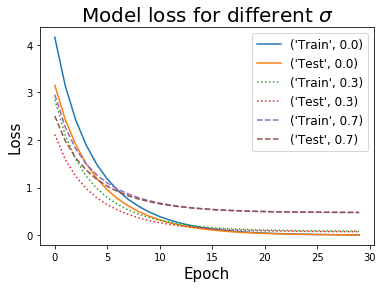

In [46]:
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
score2 = model2.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
score3 = model3.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
print()
print('Test loss, \N{greek small letter sigma} = ', sigma1, ':', score[0])
print()
print('Test loss, \N{greek small letter sigma} = ', sigma2, ':', score2[0])
print()
print('Test loss, \N{greek small letter sigma} = ', sigma3, ':', score3[0])

plt.plot(history.history['loss'],label = ('Train',sigma1))
plt.plot(history.history['val_loss'], label = ('Test',sigma1))
plt.plot(history2.history['loss'],label = ('Train',sigma2),linestyle = 'dotted')
plt.plot(history2.history['val_loss'], label = ('Test',sigma2),linestyle = 'dotted')
plt.plot(history3.history['loss'], label = ('Train',sigma3), linestyle = 'dashed')
plt.plot(history3.history['val_loss'], label = ('Test',sigma3), linestyle = 'dashed')
plt.title('Model loss for different $\\sigma$', fontsize = 20)
plt.ylabel('Loss', fontsize = 15)
plt.xlabel('Epoch', fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

σ =  0.0
m =  [[1.914292]]      q =  [0.9994299]

σ =  0.3
m =  [[1.9506572]]      q =  [1.0075462]

σ =  0.7
m =  [[1.8953651]]      q =  [0.9901312]



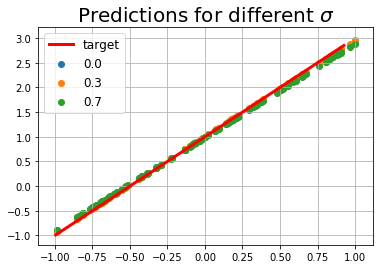

In [15]:
import matplotlib
import matplotlib.pyplot as plt

print ( '\N{greek small letter sigma} = ', sigma1)
print ("m = ", model.get_weights()[0], "     q = ",model.get_weights()[1])
print()
print ('\N{greek small letter sigma} = ' , sigma2)
print ("m = ", model2.get_weights()[0], "     q = ",model2.get_weights()[1])
print()
print ('\N{greek small letter sigma} = ', sigma3)
print ("m = ", model3.get_weights()[0], "     q = ",model3.get_weights()[1])
print()


x_predicted = np.random.uniform(-1, 1, 100)

y_predicted = model.predict(x_predicted)
y_predicted2 = model2.predict(x_predicted)
y_predicted3 = model3.predict(x_predicted)

plt.plot(x_valid, y_target, color = 'r', label = 'target', linewidth = 3)
plt.scatter(x_predicted, y_predicted, label = sigma1)
plt.scatter(x_predicted, y_predicted2, label = sigma2)
plt.scatter(x_predicted, y_predicted3, label = sigma3)
plt.grid(True)
plt.title('Predictions for different $\\sigma$', fontsize = 20)
plt.legend(fontsize = 12)
plt.show()

Osserviamo che con $500$ dati di training la rete è in grado di trovare i parametri giusti del fit anche aggiungendo del rumore esterno. Probabilmente farà più fatica usando meno dati in input quindi proviamo a vedere cosa otteniamo con lo stesso rumore ma $200$ dati di input.

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 200)    
x_valid = np.random.uniform(-1, 1, 20)     

x_valid.sort()

m = 2                                       
b = 1      

y_target = m * x_valid + b                 

sigma1 = 0.0                                       
sigma2 = 0.3                                       
sigma3 = 0.7                                      

y_train = np.random.normal(m * x_train + b, sigma1) 
y_valid = np.random.normal(m * x_valid + b, sigma1)

y_train2 = np.random.normal(m * x_train + b, sigma2) 
y_valid2 = np.random.normal(m * x_valid + b, sigma2)

y_train3 = np.random.normal(m * x_train + b, sigma3) 
y_valid3 = np.random.normal(m * x_valid + b, sigma3)



model = tf.keras.Sequential() 
model.add(Dense(1, input_shape=(1,))) 
model2 = tf.keras.Sequential() 
model2.add(Dense(1, input_shape=(1,))) 
model3 = tf.keras.Sequential() 
model3.add(Dense(1, input_shape=(1,))) 

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model3.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid))
history2 = model2.fit(x=x_train, y=y_train2, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid2))
history3 = model3.fit(x=x_train, y=y_train3, batch_size=32, epochs=30, shuffle=True, validation_data=(x_valid, y_valid3))

Epoch 1/30
7/7 [==============================] - 0s 18ms/step - loss: 1.3122 - mse: 1.3122 - val_loss: 1.0088 - val_mse: 1.0088
Epoch 2/30
7/7 [==============================] - 0s 8ms/step - loss: 1.0531 - mse: 1.0531 - val_loss: 0.8235 - val_mse: 0.8235
Epoch 3/30
7/7 [==============================] - 0s 9ms/step - loss: 0.8637 - mse: 0.8637 - val_loss: 0.6737 - val_mse: 0.6737
Epoch 4/30
7/7 [==============================] - 0s 9ms/step - loss: 0.7100 - mse: 0.7100 - val_loss: 0.5601 - val_mse: 0.5601
Epoch 5/30
7/7 [==============================] - 0s 9ms/step - loss: 0.5917 - mse: 0.5917 - val_loss: 0.4670 - val_mse: 0.4670
Epoch 6/30
7/7 [==============================] - 0s 7ms/step - loss: 0.4941 - mse: 0.4941 - val_loss: 0.3899 - val_mse: 0.3899
Epoch 7/30
7/7 [==============================] - 0s 8ms/step - loss: 0.4129 - mse: 0.4129 - val_loss: 0.3328 - val_mse: 0.3328
Epoch 8/30
7/7 [==============================] - 0s 7ms/step - loss: 0.3520 - mse: 0.3520 - val_loss: 

σ =  0.0
m =  [[1.7052019]]      q =  [0.9866917]

σ =  0.3
m =  [[1.5119505]]      q =  [0.954779]

σ =  0.7
m =  [[1.0640312]]      q =  [0.94102037]



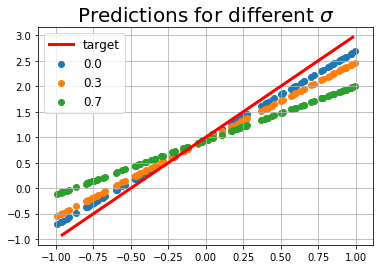

In [5]:
import matplotlib
import matplotlib.pyplot as plt

print ( '\N{greek small letter sigma} = ', sigma1)
print ("m = ", model.get_weights()[0], "     q = ",model.get_weights()[1])
print()
print ('\N{greek small letter sigma} = ' , sigma2)
print ("m = ", model2.get_weights()[0], "     q = ",model2.get_weights()[1])
print()
print ('\N{greek small letter sigma} = ', sigma3)
print ("m = ", model3.get_weights()[0], "     q = ",model3.get_weights()[1])
print()


x_predicted = np.random.uniform(-1, 1, 100)

y_predicted = model.predict(x_predicted)
y_predicted2 = model2.predict(x_predicted)
y_predicted3 = model3.predict(x_predicted)

plt.plot(x_valid, y_target, color = 'r', label = 'target', linewidth = 3)
plt.scatter(x_predicted, y_predicted, label = sigma1)
plt.scatter(x_predicted, y_predicted2, label = sigma2)
plt.scatter(x_predicted, y_predicted3, label = sigma3)
plt.grid(True)
plt.title('Predictions for different $\\sigma$', fontsize = 20)
plt.legend(fontsize = 12)
plt.show()

Come ci aspettavamo riducendo il numero di dati in input i risultati diventano più sensibili all'aggiunta di un rumore esterno. Questo ha senso, oltre che per il maggior numero di dati di training a disposizione della rete, anche perchè un rumore a media nulla non dovrebbe portare ad alcun effetto nel limite di un numero infinito di punti, pertanto se riduciamo il numero di punti in esame ci aspettiamo di vedere maggiormente gli effetti del rumore.

## Esercizio 11.2

Estendiamo il nostro modello per ottenere  un fit del seguente polinomio di terzo grado:

$$
f(x)=4-3x-2x^2+3x^3
$$
per $x \in [-1,1]$.

Poichè la funzione da fittare è più complicata di quella del caso precedente potremo avere bisogno di una rete neurale più complessa, proviamo a capire di che tipo di rete abbiamo bisogno lavorando con complessità crescente.

Lavoriamo con 500 punti di training perchè abbiamo visto che sono un numero sufficiente per fittare una funzione lineare, per una cubica potremmo avere bisogno di più punti ma per il momento ne usiamo 500.

Rappresentiamo la funzione che vogliamo fittare.

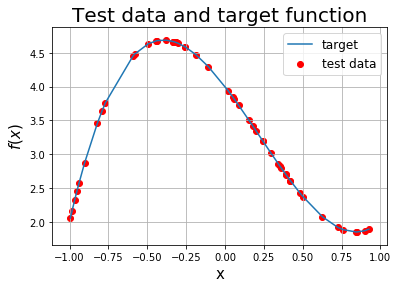

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)    #generate 100 points randomly distributed in [-1,1]
x_valid = np.random.uniform(-1, 1, 50)     #generate 10 points randomly distributed in [-1,1]
x_valid.sort()

a = 4                                       
b = -3
c = -2
d = 3

y_target = a + b*x_valid + c*x_valid**2 + d*x_valid**3                  #ideal (target) linear function

sigma = 0.0                                       

y_train = np.random.normal(a + b*x_train + c*x_train**2 + d*x_train**3, sigma)
y_valid = np.random.normal(a + b*x_valid + c*x_valid**2 + d*x_valid**3, sigma)

# plot training and target dataset
plt.plot(x_valid, y_target, label = 'target')
plt.scatter(x_valid, y_valid, color='r', label = 'test data')
plt.title('Test data and target function', fontsize = 20)
plt.xlabel('x', fontsize = 15)
plt.ylabel('$f(x)$', fontsize = 15)
plt.grid(True); 
plt.legend(fontsize = 12)
plt.show()

Usiamo lo stesso modello e la stessa rete di un singolo neurone usata precedentemente e vediamo cosa otteniamo.

In [128]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential() 
model.add(Dense(1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model.summary()
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=30,shuffle=True, validation_data=(x_valid, y_valid))

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_142 (Dense)            (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
16/16 [==============================] - 0s 7ms/step - loss: 10.0511 - mse: 10.0511 - val_loss: 7.0642 - val_mse: 7.0642
Epoch 2/30
16/16 [==============================] - 0s 3ms/step - loss: 5.7815 - mse: 5.7815 - val_loss: 4.1206 - val_mse: 4.1206
Epoch 3/30
16/16 [==============================] - 0s 4ms/step - loss: 3.4981 - mse: 3.4981 - val_loss: 2.5724 - val_mse: 2.5724
Epoch 4/30
16/16 [==============================] - 0s 4ms/step - loss: 2.2686 - mse: 2.2686 - val_loss: 1.7412 - val_mse: 1.7412
Epoch 5/30
16/16 [==============================] - 0s 4ms/step - loss: 1.5868 - mse: 1.5868 - val_loss: 1.2973 - val_mse: 1.2973
E

2/2 [==============================] - 0s 2ms/step - loss: 0.8310 - mse: 0.8310

Test loss: 0.8309782147407532

Test accuracy: 0.8309782147407532


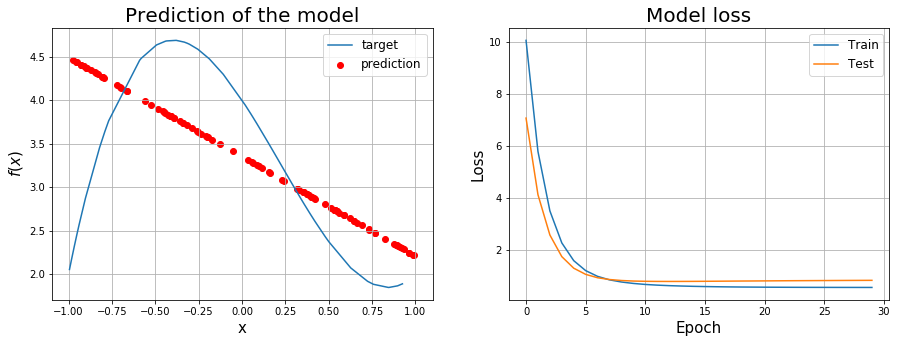

In [129]:
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
print()
print('Test loss:', score[0])
print()
print('Test accuracy:', score[1])

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[15,5])  #plots
ax = axs[0]
ax.scatter(x_predicted, y_predicted,color='r', label = 'prediction')
ax.plot(x_valid, y_target, label = 'target')
ax.set_title("Prediction of the model", fontsize = 20)
ax.set_xlabel("x", fontsize = 15)
ax.set_ylabel("$f(x)$", fontsize = 15)
ax.grid(True)
ax.legend(fontsize = 12)
ax = axs[1]
ax.plot(history.history['loss'],label = 'Train')
ax.plot(history.history['val_loss'], label = 'Test')
ax.set_title('Model loss', fontsize = 20)
ax.set_ylabel('Loss', fontsize = 15)
ax.set_xlabel('Epoch', fontsize = 15)
ax.legend(fontsize = 12)
ax.grid(True)
plt.show()

Chiaramente il processo di fit non è andato a buon fine, proviamo quindi a modificare la rete neurale aggiungendo due layer alla rete.

In [132]:
model = tf.keras.Sequential() 
model.add(Dense(6, input_shape=(1,)))
model.add(Dense(3))
model.add(Dense(1))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=30,shuffle=True, validation_data=(x_valid, y_valid))

Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_146 (Dense)            (None, 6)                 12        
_________________________________________________________________
dense_147 (Dense)            (None, 3)                 21        
_________________________________________________________________
dense_148 (Dense)            (None, 1)                 4         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
16/16 [==============================] - 0s 8ms/step - loss: 3.5731 - mse: 3.5731 - val_loss: 0.8272 - val_mse: 0.8272
Epoch 2/30
16/16 [==============================] - 0s 4ms/step - loss: 0.6259 - mse: 0.6259 - val_loss: 0.8205 - val_mse: 0.8205
Epoch 3/30
16/16 [==============================] - 0s 6ms/step - loss: 0.5664 - mse: 0.5664 - val_loss: 0.8196 - val_mse: 0.81

2/2 [==============================] - 0s 2ms/step - loss: 0.8697 - mse: 0.8697

Test loss: 0.8696745038032532

Test accuracy: 0.8696745038032532


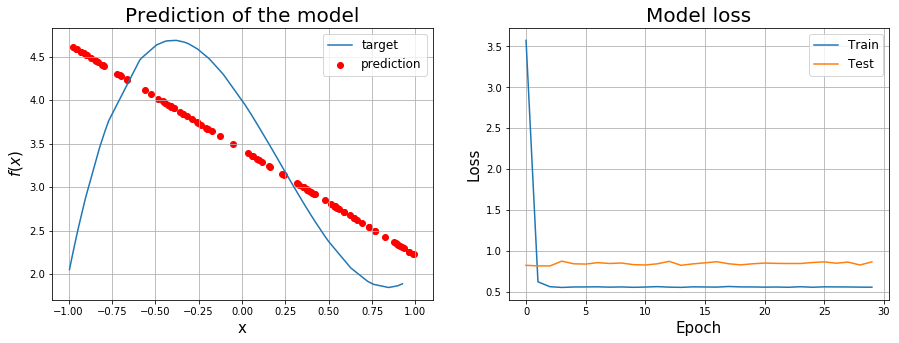

In [133]:
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
print()
print('Test loss:', score[0])
print()
print('Test accuracy:', score[1])

y_predicted = model.predict(x_predicted)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[15,5])  #plots
ax = axs[0]
ax.scatter(x_predicted, y_predicted,color='r', label = 'prediction')
ax.plot(x_valid, y_target, label = 'target')
ax.set_title("Prediction of the model", fontsize = 20)
ax.set_xlabel("x", fontsize = 15)
ax.set_ylabel("$f(x)$", fontsize = 15)
ax.grid(True)
ax.legend(fontsize = 12)
ax = axs[1]
ax.plot(history.history['loss'],label = 'Train')
ax.plot(history.history['val_loss'], label = 'Test')
ax.set_title('Model loss', fontsize = 20)
ax.set_ylabel('Loss', fontsize = 15)
ax.set_xlabel('Epoch', fontsize = 15)
ax.legend(fontsize = 12)
ax.grid(True)
plt.show()

Sembra che l'aggiunta dei layer senza la modifica della funzione di attivazione non porti ad alcun miglioramento nel fit, proviamo quindi a modificare la funzione di attivazione. Scegliamo una funzione di attivazione che non saturi all'infinito; scegliamo di usare per tutti i neuroni la funzione $relu$.

In [134]:
model = tf.keras.Sequential() 
model.add(Dense(6, input_shape=(1,),activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1,  activation='relu'))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=30,shuffle=True, validation_data=(x_valid, y_valid))

Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_149 (Dense)            (None, 6)                 12        
_________________________________________________________________
dense_150 (Dense)            (None, 3)                 21        
_________________________________________________________________
dense_151 (Dense)            (None, 1)                 4         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
16/16 [==============================] - 0s 8ms/step - loss: 6.4179 - mse: 6.4179 - val_loss: 2.2313 - val_mse: 2.2313
Epoch 2/30
16/16 [==============================] - 0s 5ms/step - loss: 1.4884 - mse: 1.4884 - val_loss: 0.9714 - val_mse: 0.9714
Epoch 3/30
16/16 [==============================] - 0s 3ms/step - loss: 0.7072 - mse: 0.7072 - val_loss: 0.7137 - val_mse: 0.71

2/2 [==============================] - 0s 2ms/step - loss: 0.2418 - mse: 0.2418

Test loss: 0.2418036311864853

Test accuracy: 0.2418036311864853


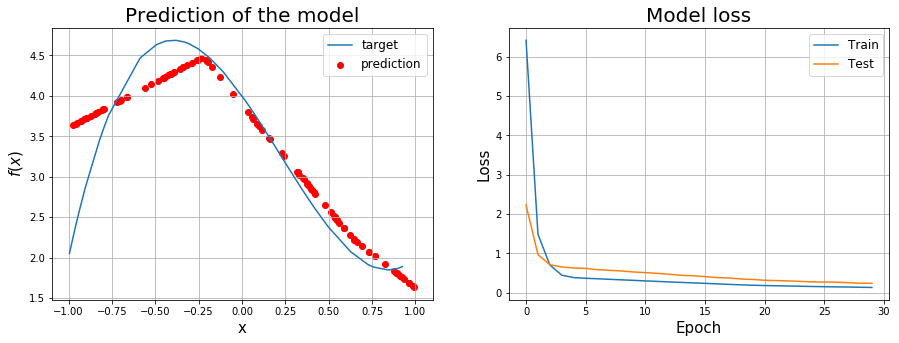

In [135]:
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
print()
print('Test loss:', score[0])
print()
print('Test accuracy:', score[1])

y_predicted = model.predict(x_predicted)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[15,5])  #plots
ax = axs[0]
ax.scatter(x_predicted, y_predicted,color='r', label = 'prediction')
ax.plot(x_valid, y_target, label = 'target')
ax.set_title("Prediction of the model", fontsize = 20)
ax.set_xlabel("x", fontsize = 15)
ax.set_ylabel("$f(x)$", fontsize = 15)
ax.grid(True)
ax.legend(fontsize = 12)
ax = axs[1]
ax.plot(history.history['loss'],label = 'Train')
ax.plot(history.history['val_loss'], label = 'Test')
ax.set_title('Model loss', fontsize = 20)
ax.set_ylabel('Loss', fontsize = 15)
ax.set_xlabel('Epoch', fontsize = 15)
ax.legend(fontsize = 12)
ax.grid(True)
plt.show()

La modifica della funzione di attivazione migliora decisamente le predizioni del modello e anche la loss dopo 30 epoche è minore che nei casi precedenti. Ovviamente non siamo ancora soddisfatti dei risultati trovati quindi proviamo ad aggiungere un layer alla nostra rete e aumetare il numero di epoche da 30 a 60.

In [153]:
model = tf.keras.Sequential() 
model.add(Dense(6, input_shape=(1,),activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1,  activation='relu'))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=60,shuffle=True, validation_data=(x_valid, y_valid))

Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_184 (Dense)            (None, 6)                 12        
_________________________________________________________________
dense_185 (Dense)            (None, 6)                 42        
_________________________________________________________________
dense_186 (Dense)            (None, 3)                 21        
_________________________________________________________________
dense_187 (Dense)            (None, 1)                 4         
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
16/16 [==============================] - 0s 8ms/step - loss: 8.6605 - mse: 8.6605 - val_loss: 4.7903 - val_mse: 4.7903
Epoch 2/60
16/16 [==============================] - 0s 3ms/step - loss: 2.8166 - mse: 2.8166 - val_loss: 1.3211 - val_mse: 1.

Epoch 57/60
16/16 [==============================] - 0s 5ms/step - loss: 0.0587 - mse: 0.0587 - val_loss: 0.0990 - val_mse: 0.0990
Epoch 58/60
16/16 [==============================] - 0s 5ms/step - loss: 0.0540 - mse: 0.0540 - val_loss: 0.1128 - val_mse: 0.1128
Epoch 59/60
16/16 [==============================] - 0s 4ms/step - loss: 0.0524 - mse: 0.0524 - val_loss: 0.0872 - val_mse: 0.0872
Epoch 60/60
16/16 [==============================] - 0s 4ms/step - loss: 0.0482 - mse: 0.0482 - val_loss: 0.0776 - val_mse: 0.0776


2/2 [==============================] - 0s 2ms/step - loss: 0.0776 - mse: 0.0776

Test loss: 0.07758120447397232

Test accuracy: 0.07758120447397232


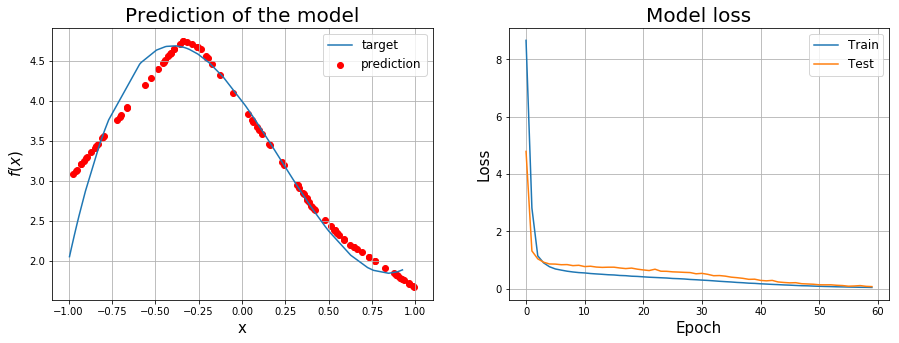

In [154]:
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
print()
print('Test loss:', score[0])
print()
print('Test accuracy:', score[1])

y_predicted = model.predict(x_predicted)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[15,5])  #plots
ax = axs[0]
ax.scatter(x_predicted, y_predicted,color='r', label = 'prediction')
ax.plot(x_valid, y_target, label = 'target')
ax.set_title("Prediction of the model", fontsize = 20)
ax.set_xlabel("x", fontsize = 15)
ax.set_ylabel("$f(x)$", fontsize = 15)
ax.grid(True)
ax.legend(fontsize = 12)
ax = axs[1]
ax.plot(history.history['loss'],label = 'Train')
ax.plot(history.history['val_loss'], label = 'Test')
ax.set_title('Model loss', fontsize = 20)
ax.set_ylabel('Loss', fontsize = 15)
ax.set_xlabel('Epoch', fontsize = 15)
ax.legend(fontsize = 12)
ax.grid(True)
plt.show()

I nostri risultati sono migliorati in quanto la loss è diminuita e la predizione del modello si avvicina alla funzione target. Proviamo ora ad aumentare il numero di neuroni in ogni layer (ad eccezione dell'ultima).

In [155]:
model = tf.keras.Sequential() 
model.add(Dense(6, input_shape=(1,),activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1,  activation='relu'))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=60,shuffle=True, validation_data=(x_valid, y_valid))

Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_188 (Dense)            (None, 6)                 12        
_________________________________________________________________
dense_189 (Dense)            (None, 24)                168       
_________________________________________________________________
dense_190 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_191 (Dense)            (None, 1)                 13        
Total params: 493
Trainable params: 493
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
16/16 [==============================] - 0s 8ms/step - loss: 4.3408 - mse: 4.3408 - val_loss: 1.3385 - val_mse: 1.3385
Epoch 2/60
16/16 [==============================] - 0s 4ms/step - loss: 0.9070 - mse: 0.9070 - val_loss: 1.1091 - val_mse: 

Epoch 57/60
16/16 [==============================] - 0s 4ms/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 58/60
16/16 [==============================] - 0s 3ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0231 - val_mse: 0.0231
Epoch 59/60
16/16 [==============================] - 0s 4ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0257 - val_mse: 0.0257
Epoch 60/60
16/16 [==============================] - 0s 4ms/step - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0196 - val_mse: 0.0196


2/2 [==============================] - 0s 4ms/step - loss: 0.0196 - mse: 0.0196

Test loss: 0.019637180492281914

Test accuracy: 0.019637180492281914


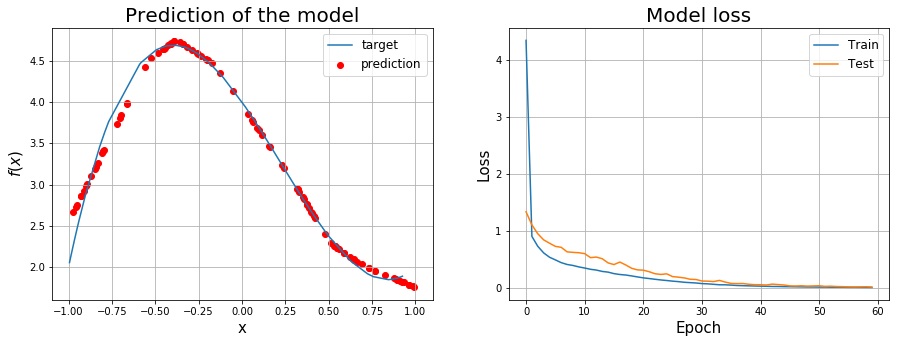

In [156]:
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
print()
print('Test loss:', score[0])
print()
print('Test accuracy:', score[1])

y_predicted = model.predict(x_predicted)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[15,5])  #plots
ax = axs[0]
ax.scatter(x_predicted, y_predicted,color='r', label = 'prediction')
ax.plot(x_valid, y_target, label = 'target')
ax.set_title("Prediction of the model", fontsize = 20)
ax.set_xlabel("x", fontsize = 15)
ax.set_ylabel("$f(x)$", fontsize = 15)
ax.grid(True)
ax.legend(fontsize = 12)
ax = axs[1]
ax.plot(history.history['loss'],label = 'Train')
ax.plot(history.history['val_loss'], label = 'Test')
ax.set_title('Model loss', fontsize = 20)
ax.set_ylabel('Loss', fontsize = 15)
ax.set_xlabel('Epoch', fontsize = 15)
ax.legend(fontsize = 12)
ax.grid(True)
plt.show()

Notiamo che aumentando i neuroni abbiamo un ulteriore miglioramento nel fit, vediamo se aggiungendo un altro layer riusciamo a migliorare ancora.

In [157]:
model = tf.keras.Sequential() 
model.add(Dense(6, input_shape=(1,),activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1,  activation='relu'))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=60,shuffle=True, validation_data=(x_valid, y_valid))

Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_192 (Dense)            (None, 6)                 12        
_________________________________________________________________
dense_193 (Dense)            (None, 12)                84        
_________________________________________________________________
dense_194 (Dense)            (None, 24)                312       
_________________________________________________________________
dense_195 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_196 (Dense)            (None, 1)                 13        
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
16/16 [==============================] - 0s 11ms/step - loss: 9.4733 - mse: 9.4733 - val_loss: 5.9414 - val_ms

Epoch 56/60
16/16 [==============================] - 0s 5ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 57/60
16/16 [==============================] - 0s 5ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 58/60
16/16 [==============================] - 0s 4ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 59/60
16/16 [==============================] - 0s 4ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 60/60
16/16 [==============================] - 0s 4ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0091 - val_mse: 0.0091


2/2 [==============================] - 0s 2ms/step - loss: 0.0091 - mse: 0.0091

Test loss: 0.00912570208311081

Test accuracy: 0.00912570208311081


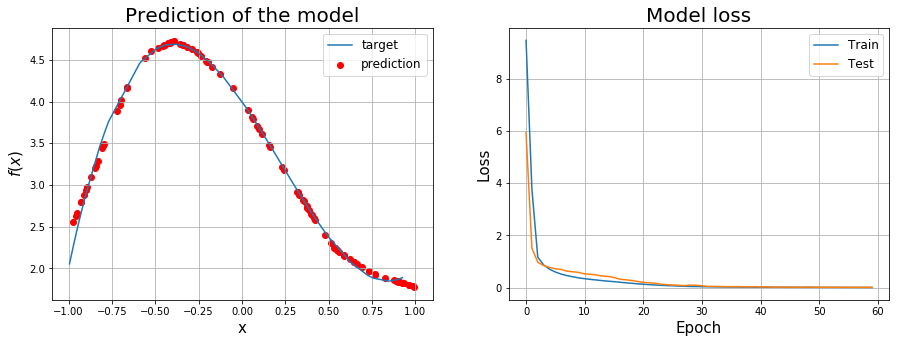

In [158]:
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
print()
print('Test loss:', score[0])
print()
print('Test accuracy:', score[1])

y_predicted = model.predict(x_predicted)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[15,5])  #plots
ax = axs[0]
ax.scatter(x_predicted, y_predicted,color='r', label = 'prediction')
ax.plot(x_valid, y_target, label = 'target')
ax.set_title("Prediction of the model", fontsize = 20)
ax.set_xlabel("x", fontsize = 15)
ax.set_ylabel("$f(x)$", fontsize = 15)
ax.grid(True)
ax.legend(fontsize = 12)
ax = axs[1]
ax.plot(history.history['loss'],label = 'Train')
ax.plot(history.history['val_loss'], label = 'Test')
ax.set_title('Model loss', fontsize = 20)
ax.set_ylabel('Loss', fontsize = 15)
ax.set_xlabel('Epoch', fontsize = 15)
ax.legend(fontsize = 12)
ax.grid(True)
plt.show()

Osserviamo che aggiungendo un altro layer la rete fornisce risultati che si avvicinano sempre di più a quelli desiderati.

Proviamo ora a cambiare la funzione di attivazione, usando prima la stessa funzione per tutti i neuroni e successivamente provando anche a combinare funzioni di attivazioni diverse. Non riportiamo tutti i risultati che abbiamo ottenuto con le funzioni di attivazione ma commentiamo quanto abbiamo trovato.

Le funzioni $softplus$ e $softmax$ applicate a tutti i neuroni portano a risultati decisamente insoddisfacenti, i risultati sono migliori se impostiamo queste funzioni solo ad un layer della rete, tuttavia in generale queste due funzioni non sembrano essere adatte al nostro problema.

Se impostiamo le tre funzioni $elu$, $selu$ e $relu$ per tutti i neuroni troviamo che la funzione che fornisce i risultati migliori è la funzione $selu$. Anche provando a combinare le funzioni su layer diversi sembra che la situazione ottimale sia quella in cui tutti i layer lavorano con la funzione $selu$. 

Osserviamo che diverse esecuzioni del processo di machine learning forniscono risultati diversi quindi ogni volta che abbiamo modificato uno di questi parametri abbiamo controllato che i risultati forniti fossero ragionevolmente simili in due esecuzioni diverse.

Riportiamo quindi quanto trovato usando $selu$ come funzione di attivazione:

In [203]:
model = tf.keras.Sequential() 
model.add(Dense(6, input_shape=(1,),activation='selu'))
model.add(Dense(12, activation='selu'))
model.add(Dense(24, activation='selu'))
model.add(Dense(12, activation='selu'))
model.add(Dense(1,  activation='selu'))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=60,shuffle=True, validation_data=(x_valid, y_valid))

Model: "sequential_97"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_307 (Dense)            (None, 6)                 12        
_________________________________________________________________
dense_308 (Dense)            (None, 12)                84        
_________________________________________________________________
dense_309 (Dense)            (None, 24)                312       
_________________________________________________________________
dense_310 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_311 (Dense)            (None, 1)                 13        
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
16/16 [==============================] - 0s 10ms/step - loss: 1.4093 - mse: 1.4093 - val_loss: 0.3593 - val_ms

2/2 [==============================] - 0s 2ms/step - loss: 0.0053 - mse: 0.0053

Test loss: 0.005314769223332405

Test accuracy: 0.005314769223332405


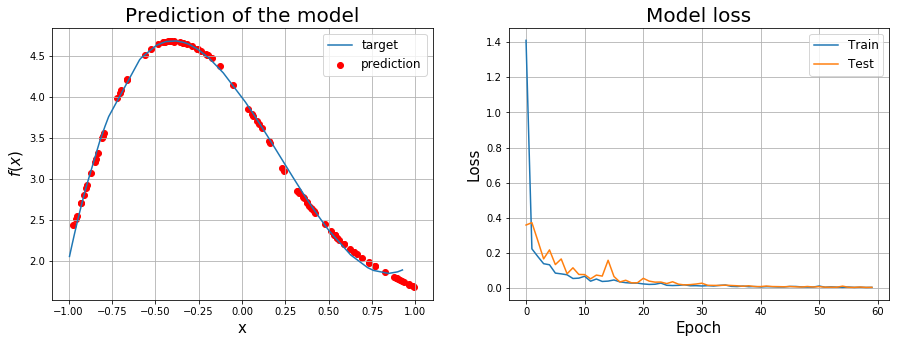

In [204]:
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
print()
print('Test loss:', score[0])
print()
print('Test accuracy:', score[1])

y_predicted = model.predict(x_predicted)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[15,5])  #plots
ax = axs[0]
ax.scatter(x_predicted, y_predicted,color='r', label = 'prediction')
ax.plot(x_valid, y_target, label = 'target')
ax.set_title("Prediction of the model", fontsize = 20)
ax.set_xlabel("x", fontsize = 15)
ax.set_ylabel("$f(x)$", fontsize = 15)
ax.grid(True)
ax.legend(fontsize = 12)
ax = axs[1]
ax.plot(history.history['loss'],label = 'Train')
ax.plot(history.history['val_loss'], label = 'Test')
ax.set_title('Model loss', fontsize = 20)
ax.set_ylabel('Loss', fontsize = 15)
ax.set_xlabel('Epoch', fontsize = 15)
ax.legend(fontsize = 12)
ax.grid(True)
plt.show()

Usiamo quindi $selu$ come funzione di attivazione e cerchiamo di trovare l'ottimizzatore migliore per il nostro problema. 

Gli ottimizzatori $adam$, $adadelta$ e $adagrad$ non forniscono buoni risultati per il nostro problema. Possiamo però provare a modificare i parametri dell'ottimizatore $SGD$.

In [251]:
model = tf.keras.Sequential() 
model.add(Dense(6, input_shape=(1,),activation='selu'))
model.add(Dense(12, activation='selu'))
model.add(Dense(24, activation='selu'))
model.add(Dense(12, activation='selu'))
model.add(Dense(1,  activation='selu'))
sgd = optimizers.SGD(lr=0.01, decay = 1e-10, momentum = 0.95, nesterov = True)
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=60,shuffle=True, validation_data=(x_valid, y_valid))

Model: "sequential_122"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_430 (Dense)            (None, 6)                 12        
_________________________________________________________________
dense_431 (Dense)            (None, 12)                84        
_________________________________________________________________
dense_432 (Dense)            (None, 24)                312       
_________________________________________________________________
dense_433 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_434 (Dense)            (None, 1)                 13        
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
16/16 [==============================] - 0s 9ms/step - loss: 1.6399 - mse: 1.6399 - val_loss: 0.4877 - val_ms

2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - mse: 0.0056

Test loss: 0.005609895568341017

Test accuracy: 0.005609895568341017


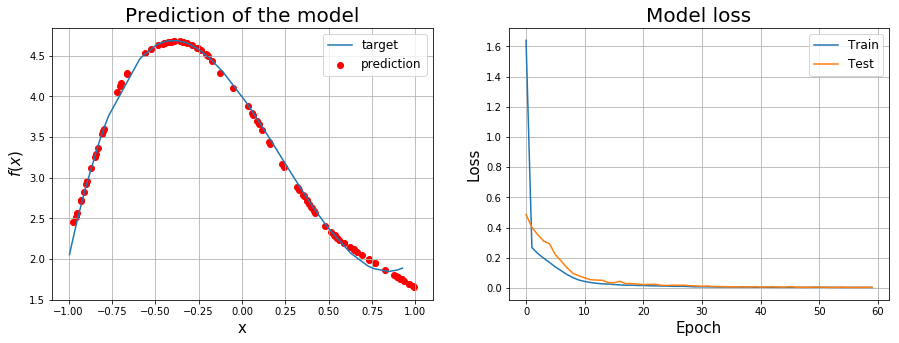

In [252]:
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
print()
print('Test loss:', score[0])
print()
print('Test accuracy:', score[1])

y_predicted = model.predict(x_predicted)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[15,5])  #plots
ax = axs[0]
ax.scatter(x_predicted, y_predicted,color='r', label = 'prediction')
ax.plot(x_valid, y_target, label = 'target')
ax.set_title("Prediction of the model", fontsize = 20)
ax.set_xlabel("x", fontsize = 15)
ax.set_ylabel("$f(x)$", fontsize = 15)
ax.grid(True)
ax.legend(fontsize = 12)
ax = axs[1]
ax.plot(history.history['loss'],label = 'Train')
ax.plot(history.history['val_loss'], label = 'Test')
ax.set_title('Model loss', fontsize = 20)
ax.set_ylabel('Loss', fontsize = 15)
ax.set_xlabel('Epoch', fontsize = 15)
ax.legend(fontsize = 12)
ax.grid(True)
plt.show()

I risultati trovati non sembrano giustificare una modifica dei parametri di $SGD$ che quindi possiamo utilizzare con i suoi parametri predefiniti.

Proviamo ora a modificare la funzione di loss.

Oltre alla $mse$, che abbiamo usato finora, proviamo le funzioni $mae$, $msle$ e $logcosh$, tra tutte queste sembra che, nella nostra situazione, le due funzioni migliori siano $mse$ e $logcosh$.

Riportiamo un esempio di quanto trovato per $logcosh$. 

In [263]:
model = tf.keras.Sequential() 
model.add(Dense(6, input_shape=(1,),activation='selu'))
model.add(Dense(12, activation='selu'))
model.add(Dense(24, activation='selu'))
model.add(Dense(12, activation='selu'))
model.add(Dense(1,  activation='selu'))
model.compile(optimizer='sgd', loss='logcosh', metrics=['mse'])
model.summary()
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=60,shuffle=True, validation_data=(x_valid, y_valid))

Model: "sequential_129"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_465 (Dense)            (None, 6)                 12        
_________________________________________________________________
dense_466 (Dense)            (None, 12)                84        
_________________________________________________________________
dense_467 (Dense)            (None, 24)                312       
_________________________________________________________________
dense_468 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_469 (Dense)            (None, 1)                 13        
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
16/16 [==============================] - 0s 26ms/step - loss: 0.6155 - mse: 2.2260 - val_loss: 0.1676 - val_m

Epoch 56/60
16/16 [==============================] - 0s 4ms/step - loss: 0.0028 - mse: 0.0056 - val_loss: 0.0053 - val_mse: 0.0109
Epoch 57/60
16/16 [==============================] - 0s 5ms/step - loss: 0.0027 - mse: 0.0054 - val_loss: 0.0047 - val_mse: 0.0095
Epoch 58/60
16/16 [==============================] - 0s 4ms/step - loss: 0.0024 - mse: 0.0049 - val_loss: 0.0045 - val_mse: 0.0091
Epoch 59/60
16/16 [==============================] - 0s 4ms/step - loss: 0.0027 - mse: 0.0054 - val_loss: 0.0040 - val_mse: 0.0082
Epoch 60/60
16/16 [==============================] - 0s 4ms/step - loss: 0.0024 - mse: 0.0048 - val_loss: 0.0045 - val_mse: 0.0091


2/2 [==============================] - 0s 3ms/step - loss: 0.0045 - mse: 0.0091

Test loss: 0.0044875359162688255

Test accuracy: 0.009095546789467335


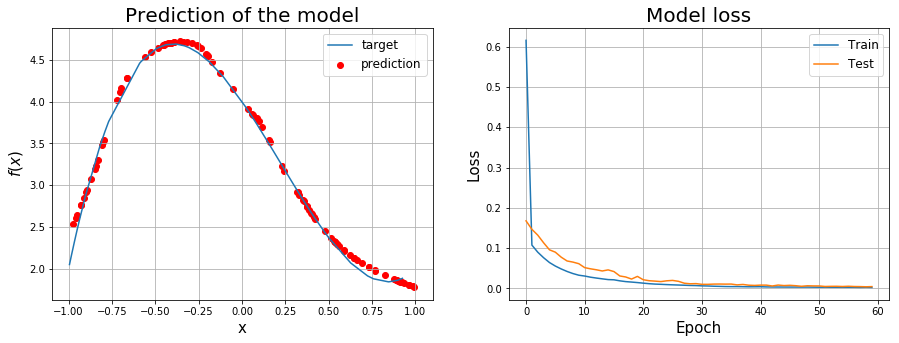

In [264]:
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
print()
print('Test loss:', score[0])
print()
print('Test accuracy:', score[1])

y_predicted = model.predict(x_predicted)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[15,5])  #plots
ax = axs[0]
ax.scatter(x_predicted, y_predicted,color='r', label = 'prediction')
ax.plot(x_valid, y_target, label = 'target')
ax.set_title("Prediction of the model", fontsize = 20)
ax.set_xlabel("x", fontsize = 15)
ax.set_ylabel("$f(x)$", fontsize = 15)
ax.grid(True)
ax.legend(fontsize = 12)
ax = axs[1]
ax.plot(history.history['loss'],label = 'Train')
ax.plot(history.history['val_loss'], label = 'Test')
ax.set_title('Model loss', fontsize = 20)
ax.set_ylabel('Loss', fontsize = 15)
ax.set_xlabel('Epoch', fontsize = 15)
ax.legend(fontsize = 12)
ax.grid(True)
plt.show()

I risultati ottenuti fino ad ora sono abbastanza soddisfacenti tuttavia vorremo riuscire a fittare meglio la nostra funzione, proviamo quindi ad aumentare i dati di training.
Con 1000 dati di training non otteniamo miglioramenti significativi, con 5000 otteniamo qualche miglioramento ma la situazione migliora significativamente solo se aggiungiamo parametri alla rete, cioè se aggiungiamo altri layers e aumentiamo il numero di neuroni nei vari layers.

Osserviamo anche che per il nostro problema sembra essere più importante il numero di parametri della rete piu che la struttura di quest'ultima.

Riportiamo i risultati ottenuti in una configurazione che reputiamo ragionevolmente ottimale. 

In [375]:
import numpy as np
import matplotlib.pyplot as plt

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 5000)    #generate 100 points randomly distributed in [-1,1]
x_valid = np.random.uniform(-1, 1, 500)     #generate 10 points randomly distributed in [-1,1]
x_valid.sort()

a = 4                                       
b = -3
c = -2
d = 3

y_target = a + b*x_valid + c*x_valid**2 + d*x_valid**3                  #ideal (target) linear function

sigma = 0.0                                       

y_train = np.random.normal(a + b*x_train + c*x_train**2 + d*x_train**3, sigma)
y_valid = np.random.normal(a + b*x_valid + c*x_valid**2 + d*x_valid**3, sigma)

In [317]:
model = tf.keras.Sequential() 
model.add(Dense(6, input_shape=(1,),activation='selu'))
model.add(Dense(12, activation='selu'))
model.add(Dense(24, activation='selu'))
model.add(Dense(48, activation='selu'))
model.add(Dense(24, activation='selu'))
model.add(Dense(1,  activation='selu'))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=60,shuffle=True, validation_data=(x_valid, y_valid))

Model: "sequential_151"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_612 (Dense)            (None, 6)                 12        
_________________________________________________________________
dense_613 (Dense)            (None, 12)                84        
_________________________________________________________________
dense_614 (Dense)            (None, 24)                312       
_________________________________________________________________
dense_615 (Dense)            (None, 48)                1200      
_________________________________________________________________
dense_616 (Dense)            (None, 24)                1176      
_________________________________________________________________
dense_617 (Dense)            (None, 1)                 25        
Total params: 2,809
Trainable params: 2,809
Non-trainable params: 0
__________________________________________________

16/16 [==============================] - 0s 2ms/step - loss: 4.3916e-04 - mse: 4.3916e-04

Test loss: 0.0004391619295347482

Test accuracy: 0.0004391619295347482


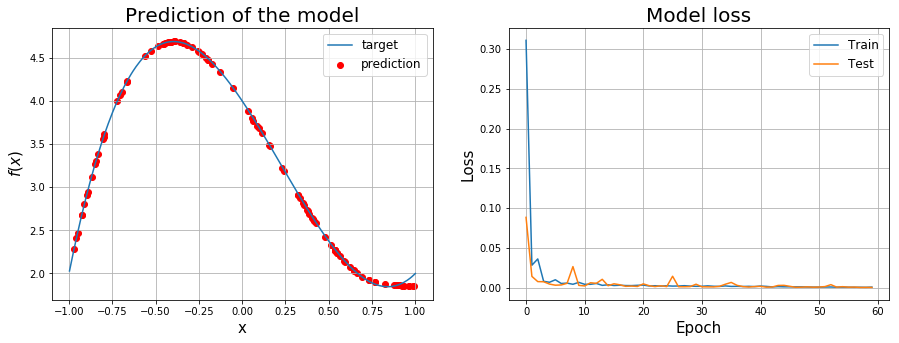

In [318]:
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
print()
print('Test loss:', score[0])
print()
print('Test accuracy:', score[1])

y_predicted = model.predict(x_predicted)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[15,5])  #plots
ax = axs[0]
ax.scatter(x_predicted, y_predicted,color='r', label = 'prediction')
ax.plot(x_valid, y_target, label = 'target')
ax.set_title("Prediction of the model", fontsize = 20)
ax.set_xlabel("x", fontsize = 15)
ax.set_ylabel("$f(x)$", fontsize = 15)
ax.grid(True)
ax.legend(fontsize = 12)
ax = axs[1]
ax.plot(history.history['loss'],label = 'Train')
ax.plot(history.history['val_loss'], label = 'Test')
ax.set_title('Model loss', fontsize = 20)
ax.set_ylabel('Loss', fontsize = 15)
ax.set_xlabel('Epoch', fontsize = 15)
ax.legend(fontsize = 12)
ax.grid(True)
plt.show()

Vediamo se la nostra rete è in grado di fittare la funzione in esame anche quando i dati di training sono affetti da rumore.

In [378]:
import numpy as np
import matplotlib.pyplot as plt

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 5000)    #generate 100 points randomly distributed in [-1,1]
x_valid = np.random.uniform(-1, 1, 500)     #generate 10 points randomly distributed in [-1,1]
x_valid.sort()

a = 4                                       
b = -3
c = -2
d = 3

y_target = a + b*x_valid + c*x_valid**2 + d*x_valid**3                  #ideal (target) linear function

sigma = 0.3                                       

y_train = np.random.normal(a + b*x_train + c*x_train**2 + d*x_train**3, sigma)
y_valid = np.random.normal(a + b*x_valid + c*x_valid**2 + d*x_valid**3, sigma)

In [351]:
model = tf.keras.Sequential() 
model.add(Dense(1, input_shape=(1,),activation='selu'))
model.add(Dense(12, activation='selu'))
model.add(Dense(24, activation='selu'))
model.add(Dense(48, activation='selu'))
model.add(Dense(60, activation='selu'))
model.add(Dense(40, activation='selu'))
model.add(Dense(1,  activation='selu'))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=60,shuffle=True, validation_data=(x_valid, y_valid))

Model: "sequential_162"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_678 (Dense)            (None, 1)                 2         
_________________________________________________________________
dense_679 (Dense)            (None, 12)                24        
_________________________________________________________________
dense_680 (Dense)            (None, 24)                312       
_________________________________________________________________
dense_681 (Dense)            (None, 48)                1200      
_________________________________________________________________
dense_682 (Dense)            (None, 60)                2940      
_________________________________________________________________
dense_683 (Dense)            (None, 40)                2440      
_________________________________________________________________
dense_684 (Dense)            (None, 1)              

157/157 [==============================] - 0s 2ms/step - loss: 0.0969 - mse: 0.0969 - val_loss: 0.0931 - val_mse: 0.0931
Epoch 54/60
157/157 [==============================] - 0s 2ms/step - loss: 0.0951 - mse: 0.0951 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 55/60
157/157 [==============================] - 0s 2ms/step - loss: 0.0968 - mse: 0.0968 - val_loss: 0.1280 - val_mse: 0.1280
Epoch 56/60
157/157 [==============================] - 0s 2ms/step - loss: 0.0981 - mse: 0.0981 - val_loss: 0.0959 - val_mse: 0.0959
Epoch 57/60
157/157 [==============================] - 0s 2ms/step - loss: 0.0963 - mse: 0.0963 - val_loss: 0.0910 - val_mse: 0.0910
Epoch 58/60
157/157 [==============================] - 0s 2ms/step - loss: 0.0959 - mse: 0.0959 - val_loss: 0.0939 - val_mse: 0.0939
Epoch 59/60
157/157 [==============================] - 0s 2ms/step - loss: 0.0971 - mse: 0.0971 - val_loss: 0.1058 - val_mse: 0.1058
Epoch 60/60
157/157 [==============================] - 0s 2ms/step - loss: 0.0971

16/16 [==============================] - 0s 2ms/step - loss: 0.1149 - mse: 0.1149

Test loss: 0.11490119248628616

Test accuracy: 0.11490119248628616


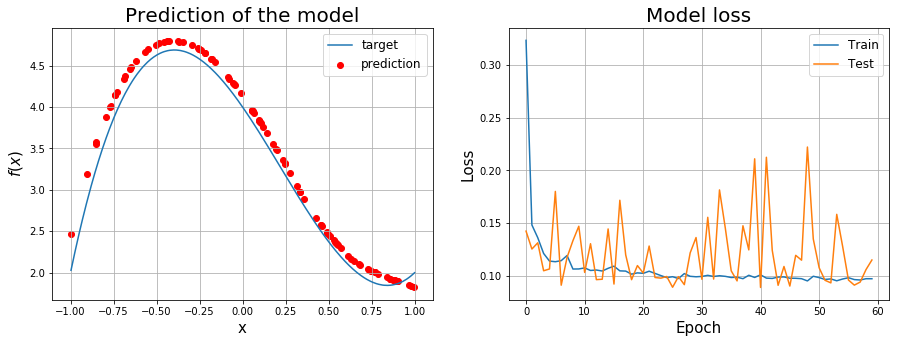

In [352]:
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
print()
print('Test loss:', score[0])
print()
print('Test accuracy:', score[1])

y_predicted = model.predict(x_predicted)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[15,5])  #plots
ax = axs[0]
ax.scatter(x_predicted, y_predicted,color='r', label = 'prediction')
ax.plot(x_valid, y_target, label = 'target')
ax.set_title("Prediction of the model", fontsize = 20)
ax.set_xlabel("x", fontsize = 15)
ax.set_ylabel("$f(x)$", fontsize = 15)
ax.grid(True)
ax.legend(fontsize = 12)
ax = axs[1]
ax.plot(history.history['loss'],label = 'Train')
ax.plot(history.history['val_loss'], label = 'Test')
ax.set_title('Model loss', fontsize = 20)
ax.set_ylabel('Loss', fontsize = 15)
ax.set_xlabel('Epoch', fontsize = 15)
ax.legend(fontsize = 12)
ax.grid(True)
plt.show()

Osserviamo che l'aggiunta del rumore complica notevolmente le cose e che quindi la nostra configurazione non sembra più adatta a risolvere il problema. Visto l'elevato numero di parametri del modello (quasi 7000) può essere che stiamo incorrendo in un problema di overfitting.
Riduciamo quindi il numero di parametri.

In [359]:
model = tf.keras.Sequential() 
model.add(Dense(1, input_shape=(1,),activation='selu'))
model.add(Dense(12, activation='selu'))
model.add(Dense(24, activation='selu'))
model.add(Dense(30, activation='selu'))
model.add(Dense(24, activation='selu'))
model.add(Dense(1,  activation='selu'))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=60,shuffle=True, validation_data=(x_valid, y_valid))

Model: "sequential_166"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_703 (Dense)            (None, 1)                 2         
_________________________________________________________________
dense_704 (Dense)            (None, 12)                24        
_________________________________________________________________
dense_705 (Dense)            (None, 24)                312       
_________________________________________________________________
dense_706 (Dense)            (None, 30)                750       
_________________________________________________________________
dense_707 (Dense)            (None, 24)                744       
_________________________________________________________________
dense_708 (Dense)            (None, 1)                 25        
Total params: 1,857
Trainable params: 1,857
Non-trainable params: 0
__________________________________________________

157/157 [==============================] - 0s 2ms/step - loss: 0.0969 - mse: 0.0969 - val_loss: 0.1971 - val_mse: 0.1971
Epoch 55/60
157/157 [==============================] - 0s 3ms/step - loss: 0.0972 - mse: 0.0972 - val_loss: 0.0968 - val_mse: 0.0968
Epoch 56/60
157/157 [==============================] - 0s 3ms/step - loss: 0.0957 - mse: 0.0957 - val_loss: 0.0948 - val_mse: 0.0948
Epoch 57/60
157/157 [==============================] - 0s 2ms/step - loss: 0.0963 - mse: 0.0963 - val_loss: 0.1224 - val_mse: 0.1224
Epoch 58/60
157/157 [==============================] - 0s 2ms/step - loss: 0.0969 - mse: 0.0969 - val_loss: 0.1907 - val_mse: 0.1907
Epoch 59/60
157/157 [==============================] - 0s 2ms/step - loss: 0.0968 - mse: 0.0968 - val_loss: 0.0964 - val_mse: 0.0964
Epoch 60/60
157/157 [==============================] - 0s 2ms/step - loss: 0.0966 - mse: 0.0966 - val_loss: 0.0893 - val_mse: 0.0893


16/16 [==============================] - 0s 1ms/step - loss: 0.0893 - mse: 0.0893

Test loss: 0.08929107338190079

Test accuracy: 0.08929107338190079


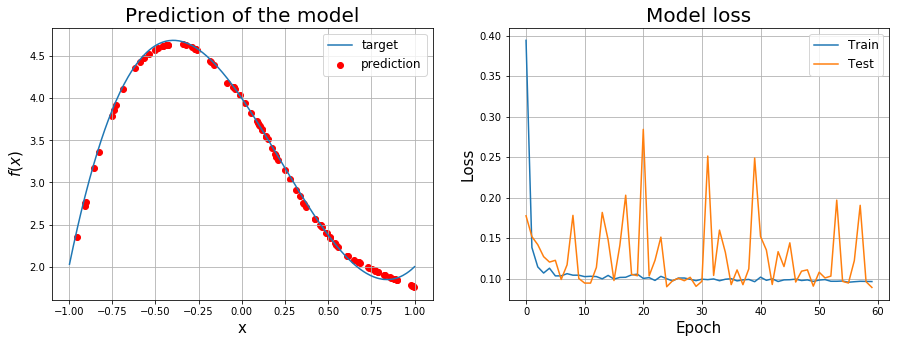

In [360]:
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
print()
print('Test loss:', score[0])
print()
print('Test accuracy:', score[1])
x_predicted = np.random.uniform(-1., 1., 100)
y_predicted = model.predict(x_predicted)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[15,5])  #plots
ax = axs[0]
ax.scatter(x_predicted, y_predicted,color='r', label = 'prediction')
ax.plot(x_valid, y_target, label = 'target')
ax.set_title("Prediction of the model", fontsize = 20)
ax.set_xlabel("x", fontsize = 15)
ax.set_ylabel("$f(x)$", fontsize = 15)
ax.grid(True)
ax.legend(fontsize = 12)
ax = axs[1]
ax.plot(history.history['loss'],label = 'Train')
ax.plot(history.history['val_loss'], label = 'Test')
ax.set_title('Model loss', fontsize = 20)
ax.set_ylabel('Loss', fontsize = 15)
ax.set_xlabel('Epoch', fontsize = 15)
ax.legend(fontsize = 12)
ax.grid(True)
plt.show()

Anche riducendo il numero di parametri sembra che riusciamo a fittare leggermente meglio la funzione ma abbiamo ancofa dei picchi nella loss che vorremo non avere. Evidentemente il nostro modello ha difficoltà a lavorare con dati rumorosi.

Cerchiamo quindi una nuova configurazione per fittare la funzione anche in presenza di rumore nei dati di training e validazione. Riportiamo la nuova configurazione che abbiamo trovato:

In [380]:
model = tf.keras.Sequential() 
model.add(Dense(6, input_shape=(1,),activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(48, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1,  activation='relu'))
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.summary()
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=60,shuffle=True, validation_data=(x_valid, y_valid))

Model: "sequential_171"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_733 (Dense)            (None, 6)                 12        
_________________________________________________________________
dense_734 (Dense)            (None, 12)                84        
_________________________________________________________________
dense_735 (Dense)            (None, 24)                312       
_________________________________________________________________
dense_736 (Dense)            (None, 48)                1200      
_________________________________________________________________
dense_737 (Dense)            (None, 24)                1176      
_________________________________________________________________
dense_738 (Dense)            (None, 1)                 25        
Total params: 2,809
Trainable params: 2,809
Non-trainable params: 0
__________________________________________________

157/157 [==============================] - 0s 1ms/step - loss: 0.0922 - mse: 0.0922 - val_loss: 0.0883 - val_mse: 0.0883
Epoch 55/60
157/157 [==============================] - 0s 1ms/step - loss: 0.0919 - mse: 0.0919 - val_loss: 0.0927 - val_mse: 0.0927
Epoch 56/60
157/157 [==============================] - 0s 1ms/step - loss: 0.0914 - mse: 0.0914 - val_loss: 0.0865 - val_mse: 0.0865
Epoch 57/60
157/157 [==============================] - 0s 1ms/step - loss: 0.0915 - mse: 0.0915 - val_loss: 0.0886 - val_mse: 0.0886
Epoch 58/60
157/157 [==============================] - 0s 1ms/step - loss: 0.0941 - mse: 0.0941 - val_loss: 0.0913 - val_mse: 0.0913
Epoch 59/60
157/157 [==============================] - 0s 1ms/step - loss: 0.0918 - mse: 0.0918 - val_loss: 0.0881 - val_mse: 0.0881
Epoch 60/60
157/157 [==============================] - 0s 1ms/step - loss: 0.0923 - mse: 0.0923 - val_loss: 0.0884 - val_mse: 0.0884


16/16 [==============================] - 0s 1ms/step - loss: 0.0884 - mse: 0.0884

Test loss: 0.08842132240533829

Test accuracy: 0.08842132240533829


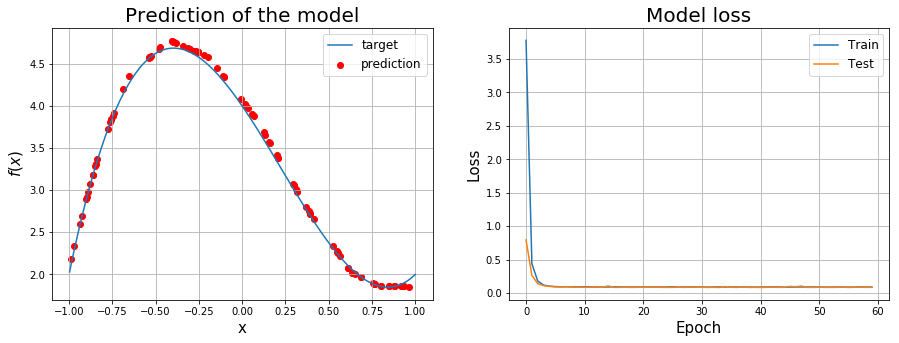

In [381]:
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
print()
print('Test loss:', score[0])
print()
print('Test accuracy:', score[1])
x_predicted = np.random.uniform(-1., 1., 100)
y_predicted = model.predict(x_predicted)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[15,5])  #plots
ax = axs[0]
ax.scatter(x_predicted, y_predicted,color='r', label = 'prediction')
ax.plot(x_valid, y_target, label = 'target')
ax.set_title("Prediction of the model", fontsize = 20)
ax.set_xlabel("x", fontsize = 15)
ax.set_ylabel("$f(x)$", fontsize = 15)
ax.grid(True)
ax.legend(fontsize = 12)
ax = axs[1]
ax.plot(history.history['loss'],label = 'Train')
ax.plot(history.history['val_loss'], label = 'Test')
ax.set_title('Model loss', fontsize = 20)
ax.set_ylabel('Loss', fontsize = 15)
ax.set_xlabel('Epoch', fontsize = 15)
ax.legend(fontsize = 12)
ax.grid(True)
plt.show()

Osserviamo che la nuova configurazione che abbiamo trovato fornisce risultati molto migliori di quella precedente sul set di dati rumorosi.

Proviamo ora la nuova configurazione su dei dati non rumorosi.

In [389]:
import numpy as np
import matplotlib.pyplot as plt

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 5000)    #generate 100 points randomly distributed in [-1,1]
x_valid = np.random.uniform(-1, 1, 500)     #generate 10 points randomly distributed in [-1,1]
x_valid.sort()

a = 4                                       
b = -3
c = -2
d = 3

y_target = a + b*x_valid + c*x_valid**2 + d*x_valid**3                  #ideal (target) linear function

sigma = 0.0                                      

y_train = np.random.normal(a + b*x_train + c*x_train**2 + d*x_train**3, sigma)
y_valid = np.random.normal(a + b*x_valid + c*x_valid**2 + d*x_valid**3, sigma)
model = tf.keras.Sequential() 
model.add(Dense(6, input_shape=(1,),activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(48, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1,  activation='relu'))
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.summary()
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=60,shuffle=True, validation_data=(x_valid, y_valid))

Model: "sequential_175"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_757 (Dense)            (None, 6)                 12        
_________________________________________________________________
dense_758 (Dense)            (None, 12)                84        
_________________________________________________________________
dense_759 (Dense)            (None, 24)                312       
_________________________________________________________________
dense_760 (Dense)            (None, 48)                1200      
_________________________________________________________________
dense_761 (Dense)            (None, 24)                1176      
_________________________________________________________________
dense_762 (Dense)            (None, 1)                 25        
Total params: 2,809
Trainable params: 2,809
Non-trainable params: 0
__________________________________________________

Epoch 49/60
157/157 [==============================] - 0s 1ms/step - loss: 1.5052e-04 - mse: 1.5052e-04 - val_loss: 2.4988e-04 - val_mse: 2.4988e-04
Epoch 50/60
157/157 [==============================] - 0s 1ms/step - loss: 2.7900e-04 - mse: 2.7900e-04 - val_loss: 1.8616e-04 - val_mse: 1.8616e-04
Epoch 51/60
157/157 [==============================] - 0s 1ms/step - loss: 2.2514e-04 - mse: 2.2514e-04 - val_loss: 1.3073e-04 - val_mse: 1.3073e-04
Epoch 52/60
157/157 [==============================] - 0s 1ms/step - loss: 1.8064e-04 - mse: 1.8064e-04 - val_loss: 4.1241e-04 - val_mse: 4.1241e-04
Epoch 53/60
157/157 [==============================] - 0s 1ms/step - loss: 1.5730e-04 - mse: 1.5730e-04 - val_loss: 4.6897e-05 - val_mse: 4.6897e-05
Epoch 54/60
157/157 [==============================] - 0s 1ms/step - loss: 8.2006e-05 - mse: 8.2006e-05 - val_loss: 5.7564e-05 - val_mse: 5.7564e-05
Epoch 55/60
157/157 [==============================] - 0s 1ms/step - loss: 3.2335e-04 - mse: 3.2335e-04 - 

16/16 [==============================] - 0s 910us/step - loss: 9.5901e-05 - mse: 9.5901e-05

Test loss: 9.590125409886241e-05

Test accuracy: 9.590125409886241e-05


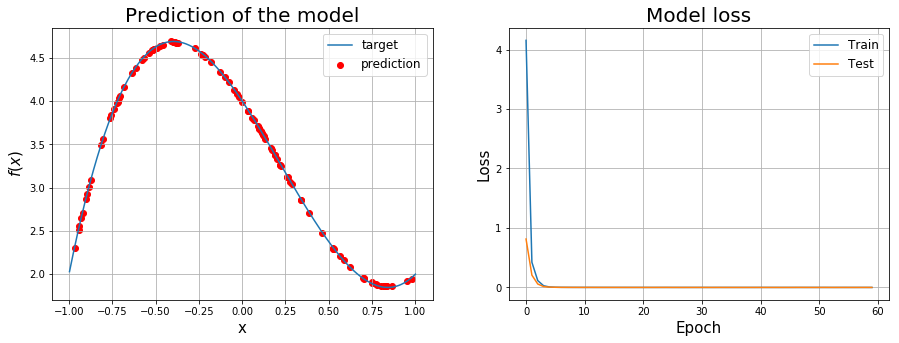

In [390]:
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
print()
print('Test loss:', score[0])
print()
print('Test accuracy:', score[1])
x_predicted = np.random.uniform(-1., 1., 100)
y_predicted = model.predict(x_predicted)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[15,5])  #plots
ax = axs[0]
ax.scatter(x_predicted, y_predicted,color='r', label = 'prediction')
ax.plot(x_valid, y_target, label = 'target')
ax.set_title("Prediction of the model", fontsize = 20)
ax.set_xlabel("x", fontsize = 15)
ax.set_ylabel("$f(x)$", fontsize = 15)
ax.grid(True)
ax.legend(fontsize = 12)
ax = axs[1]
ax.plot(history.history['loss'],label = 'Train')
ax.plot(history.history['val_loss'], label = 'Test')
ax.set_title('Model loss', fontsize = 20)
ax.set_ylabel('Loss', fontsize = 15)
ax.set_xlabel('Epoch', fontsize = 15)
ax.legend(fontsize = 12)
ax.grid(True)
plt.show()

I risultati che troviamo sono molto migliori di quelli che avevamo con il modello precedente... a volte avere problemi porta a risultati migliori!

Proviamo infine a vedere se il nostro modello riesce a dare buone previsioni anche per dati fuori dall'intervallo su cui si è allenato.

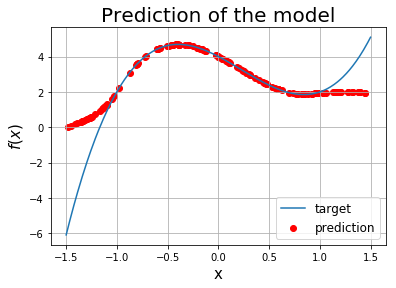

In [392]:
x_predicted = np.random.uniform(-1.5, 1.5, 150)
x_valid = np.random.uniform(-1.5, 1.5, 500)     #generate 10 points randomly distributed in [-1,1]
x_valid.sort()
y_predicted = model.predict(x_predicted)
y_target = a + b*x_valid + c*x_valid**2 + d*x_valid**3                  #ideal (target) linear function

plt.scatter(x_predicted, y_predicted,color='r', label = 'prediction')
plt.plot(x_valid, y_target, label = 'target')
plt.title("Prediction of the model", fontsize = 20)
plt.xlabel("x", fontsize = 15)
plt.ylabel("$f(x)$", fontsize = 15)
plt.grid(True)
plt.legend(fontsize = 12)
plt.show()

Vediamo che le previsioni all'interno dell'intervallo in cui il sistema è stato allenato sono buone mentre quelle al di fuori dell'intervallo sono decisamente non attendibili.

In conclusione la rete che abbiamo usato è composta da 6 layer con diverso numero di neuroni (6-12-24-48-24-1), per un totale di circa 2800 parametri, e ciascun layer usa la funzione di attivazione relu.

Il modello che abbiamo utilizzato è il seguente:
- optimizer: adam
- loss: mean square error

e i parametri per il training della rete sono:
- batch size: 32
- epochs: 60

Osserviamo che più che l'architettura della rete sembra che la buona riuscita del fit sia dipendente dalla complessità del modello (cioè dal numero di parametri). Guardando quello che abbiamo trovato usando quasi 7000 parametri in presenza di rumore ci si rende conto che, in presenza di rumore, un eccessivo numero di parametri non porta a buoni risultati, probabilmente per via di problemi di overfitting. Riducendo il numero di parametri a circa 2000 siamo effettivamente riusciti a fittare meglio la funzione, tuttavia alla fine sono stati il cambio della funzione di attivazione e dell'ottimizzatore che si sono rivelati decisivi per migliorare la qualità dei nostri risultati.

## Esercizio 11.3

Estendiamo il nostro modello per fittare una funzione da $R^2$ in $R$. 
La funzione che vogliamo fittare è:

$$
f(x,y) = \sin(x^2+y^2)
$$ 
con $x \in [-3/2,3/2]$ e $y \in [-3/2,3/2]$.

Utilizziamo il modello e la rete che abbiamo trovato alla fine dell'esercizio precedente, tuttavia in questo caso dobbiamo cambiare in 2 il numero dei dati di input nel primo layer di neuroni. 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

np.random.seed(0)
x_train = np.zeros((500, 2))
x_train[:,0] = np.random.uniform(-1.5, 1.5, 500)
x_train[:,1] = np.random.uniform(-1.5, 1.5, 500)
x_valid = np.zeros((50, 2))
x_valid[:,0] = np.random.uniform(-1.5, 1.5, 50)
x_valid[:,1] = np.random.uniform(-1.5, 1.5, 50)

y_target = np.sin(x_valid[:,0]**2 + x_valid[:,1]**2) 

sigma = 0.1 
y_train = np.random.normal(np.sin(x_train[:,0]**2 + x_train[:,1]**2), sigma) 
y_valid = np.random.normal(np.sin(x_valid[:,0]**2 + x_valid[:,1]**2), sigma)

model = tf.keras.Sequential() 
model.add(Dense(6, input_shape=(2,),activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(48, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1,  activation='relu'))
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.summary()

history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=60,shuffle=True, validation_data=(x_valid, y_valid))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 6)                 18        
_________________________________________________________________
dense_13 (Dense)             (None, 12)                84        
_________________________________________________________________
dense_14 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_15 (Dense)             (None, 48)                1200      
_________________________________________________________________
dense_16 (Dense)             (None, 24)                1176      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 25        
Total params: 2,815
Trainable params: 2,815
Non-trainable params: 0
____________________________________________________

Epoch 55/60
16/16 [==============================] - 0s 5ms/step - loss: 0.0356 - mse: 0.0356 - val_loss: 0.0609 - val_mse: 0.0609
Epoch 56/60
16/16 [==============================] - 0s 5ms/step - loss: 0.0351 - mse: 0.0351 - val_loss: 0.0602 - val_mse: 0.0602
Epoch 57/60
16/16 [==============================] - 0s 4ms/step - loss: 0.0367 - mse: 0.0367 - val_loss: 0.0666 - val_mse: 0.0666
Epoch 58/60
16/16 [==============================] - 0s 4ms/step - loss: 0.0335 - mse: 0.0335 - val_loss: 0.0614 - val_mse: 0.0614
Epoch 59/60
16/16 [==============================] - 0s 6ms/step - loss: 0.0359 - mse: 0.0359 - val_loss: 0.0591 - val_mse: 0.0591
Epoch 60/60
16/16 [==============================] - 0s 7ms/step - loss: 0.0321 - mse: 0.0321 - val_loss: 0.0583 - val_mse: 0.0583


2/2 [==============================] - 0s 2ms/step - loss: 0.0583 - mse: 0.0583

Test loss: model: 0.058283720165491104

Test accuracy: 0.058283720165491104


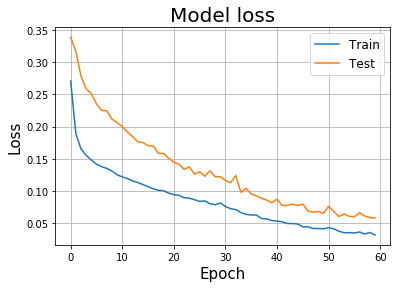

In [8]:
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
print()
print('Test loss: model:', score[0])
print()
print('Test accuracy:', score[1])

plt.plot(history.history['loss'],label = 'Train')
plt.plot(history.history['val_loss'], label = 'Test')
plt.title('Model loss', fontsize = 20)
plt.ylabel('Loss', fontsize = 15)
plt.xlabel('Epoch', fontsize = 15)
plt.legend(fontsize = 12)
plt.grid(True)
plt.show()

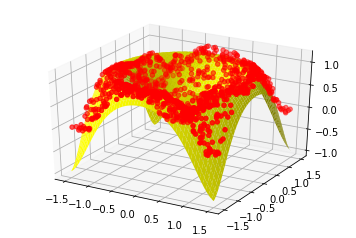

In [13]:
x_predicted = np.zeros((1000 ,2))
x_predicted[:,0] = np.random.uniform(-1.5, 1.5, 1000)
x_predicted[:,1] = np.random.uniform(-1.5, 1.5, 1000)
y_predicted = model.predict(x_predicted)
range = np.linspace (-1.5, 1.5, 200);
[X, Y] = np.meshgrid (range, range);
Z = np.sin (X**2 + Y**2);
a = plt.axes(projection='3d')
a.plot_surface(X, Y, Z, color='yellow')
a.scatter3D(x_predicted[:,0], x_predicted[:,1], y_predicted, color='r')
plt.grid(True)
plt.show()

Vediamo che effettivamente la a nostra rete è stata in grado di fittare la funzione in esame.